In [1]:
from keras.datasets import cifar10
from keras.utils import np_utils
import numpy as np
from cifar_keras_vgg import VGG
from utils import Utils
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from adversarial_tf import Adversarial
from PIL import Image
%matplotlib inline

Using TensorFlow backend.


In [2]:
vgg = VGG(32, 32, 3)
utils = Utils()
X_train, y_train, X_test, y_test = utils.load_cifar10()
adv_cls = Adversarial()

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
targets = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [4]:
model = vgg.model(dropout=True)
model.load_weights("unbalanced_0_vgg_custom.h5")
scores = model.evaluate(X_test, y_test)
acc = (scores[1] * 100)
y_pred = model.predict_classes(X_test)

 9856/10000 [============================>.] - ETA: 0s

In [5]:
print(scores)

[0.57312975454330439, 0.80269999999999997]


In [6]:
rp = classification_report(np.argmax(y_test, axis=1), y_pred)
cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

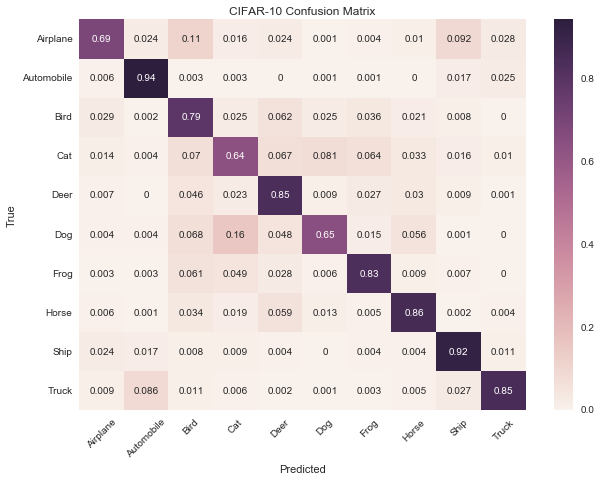

In [7]:
df_cm = pd.DataFrame(cm, index=targets, columns=targets)

plt.figure(figsize=(10, 7))
plt.xticks(rotation=45)
plt.yticks(rotation=60)
hm = sns.heatmap(df_cm, annot=True)
hm.axes.set_title("CIFAR-10 Confusion Matrix")
hm.axes.set_xlabel("Predicted")
hm.axes.set_ylabel("True")